In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [37]:
df = pd.read_csv("D:\Data Science and Big Data\\fcc-Tensorflow\datasets\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
len(df[df.Outcome == 1]),len(df[df.Outcome == 0])
# to have equal no. of diabetes and no diabetes use normalization
# normalizing : taking each values dividing each values in the data set 

(268, 500)

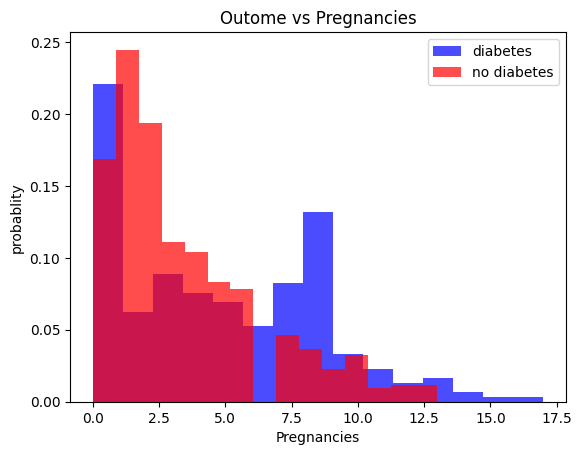

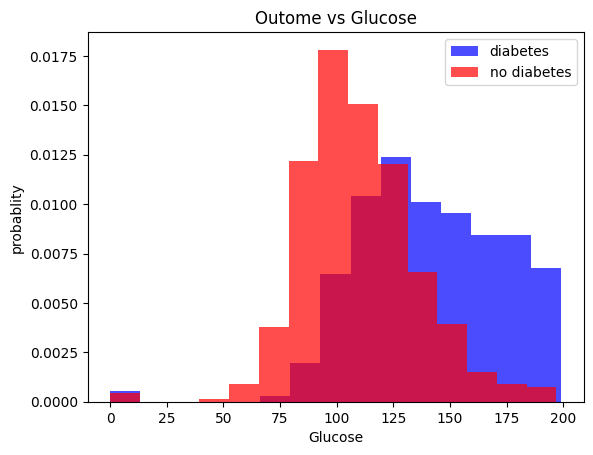

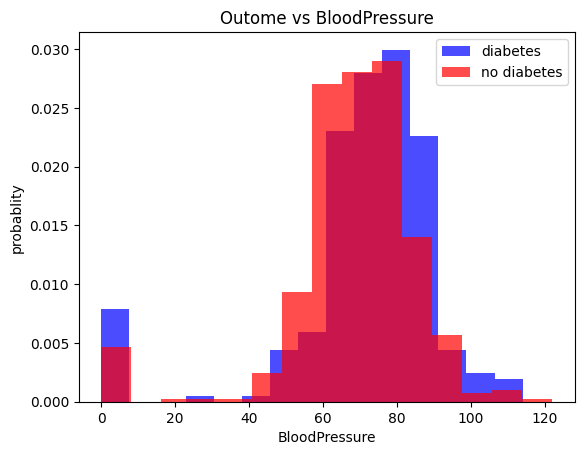

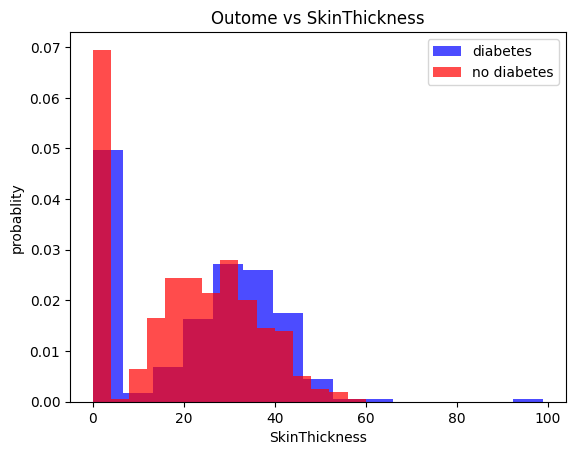

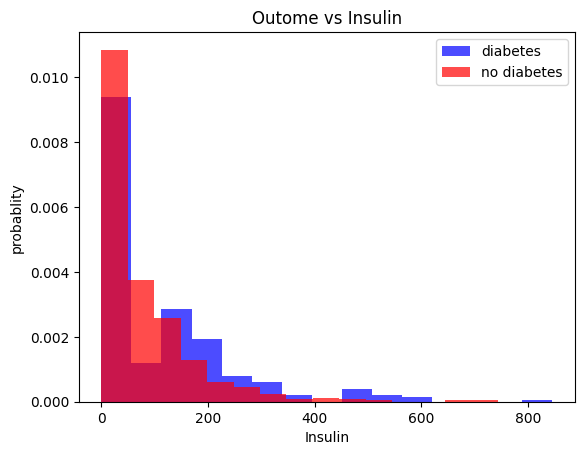

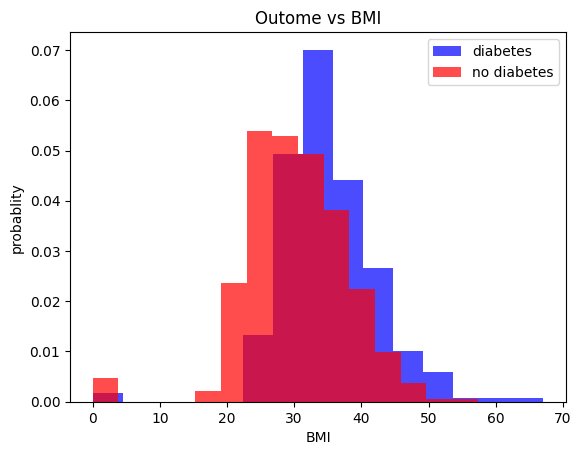

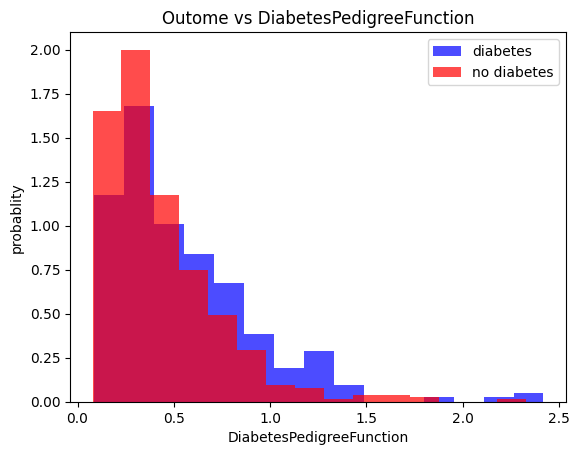

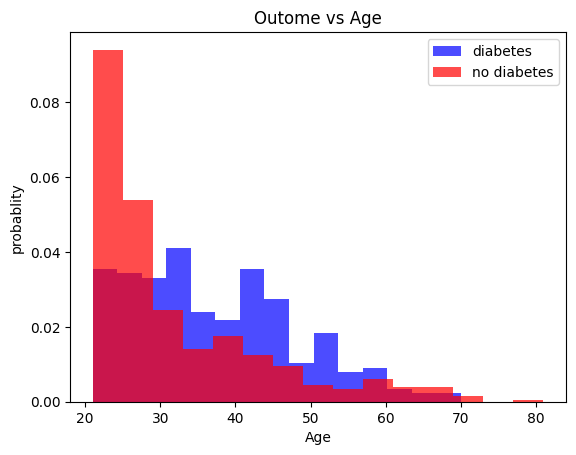

In [39]:
for i in range(len(df.columns)-1):
    label = df.columns[i]
    plt.hist(df[df.Outcome == 1][label],color='blue',label='diabetes',alpha=0.7, density=True, bins=15)
    plt.hist(df[df.Outcome == 0][label],color='red',label='no diabetes',alpha=0.7, density=True, bins=15)
    plt.title("Outome vs {}".format(label))
    plt.xlabel(label)
    plt.ylabel("probablity")
    plt.legend()
    plt.show()
# aplha for transperency 
# to have equal no. of diabetes and no diabetes use normalization
# normalizing taking each values dividing each values in the data set 

In [40]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [42]:
over = RandomOverSampler()
X,y = over.fit_resample(X,y)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [43]:
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state=0)
#radnom 0 doesnt split

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16 , activation= 'relu'),
    tf.keras.layers.Dense(16 , activation= 'relu'),
    tf.keras.layers.Dense(1 , activation= 'sigmoid')
])

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics= ['accuracy']
              )

In [46]:
model.evaluate(X_train , y_train) 
#just evaluating (no trained model)

19/19 [==============================] - 0s 2ms/step - loss: 0.7574 - accuracy: 0.5333


[0.7573503255844116, 0.5333333611488342]

In [47]:
model.evaluate(X_valid , y_valid) 

7/7 [==============================] - 0s 4ms/step - loss: 0.7707 - accuracy: 0.5450


[0.7707159519195557, 0.5450000166893005]

In [51]:
#training 
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 0s 5ms/step - loss: 0.3863 - accuracy: 0.8167 - val_loss: 0.3913 - val_accuracy: 0.8400
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8200 - val_loss: 0.3889 - val_accuracy: 0.8450
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3846 - accuracy: 0.8217 - val_loss: 0.3873 - val_accuracy: 0.8500
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3843 - accuracy: 0.8183 - val_loss: 0.3923 - val_accuracy: 0.8400
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8200 - val_loss: 0.3906 - val_accuracy: 0.8300
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8200 - val_loss: 0.3881 - val_accuracy: 0.8450
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8217 - val_loss: 0.3908 - val_accuracy: 0.8400
Epoch 8/20
38/38 [==